In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

In [2]:
train_dir = r'C:\Users\mdine\Downloads\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train'
test_dir =r'C:\Users\mdine\Downloads\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test'

In [4]:
for image_class in os.listdir(train_dir):
    print(image_class)

Boots
Sandals
Slippers


In [5]:
img_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 778 files belonging to 3 classes.


In [6]:
datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,horizontal_flip=True,vertical_flip=True,
                             fill_mode='reflect',validation_split=0.2)

train = datagen.flow_from_directory(train_dir,batch_size=32,target_size=(256,256),class_mode="categorical",subset="training")

validation = datagen.flow_from_directory(train_dir,batch_size=32,target_size=(256,256),
                                         class_mode="categorical", subset="validation")

Found 623 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


In [7]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [8]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=[256,256,3],activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train,epochs=50,batch_size=64,validation_data=(validation),callbacks=[callback],)

Epoch 1/50
20/20 [==============================] - 56s 3s/step - loss: 1.0498 - accuracy: 0.4398 - val_loss: 1.0120 - val_accuracy: 0.6065
Epoch 2/50
20/20 [==============================] - 33s 2s/step - loss: 0.9763 - accuracy: 0.5233 - val_loss: 0.9421 - val_accuracy: 0.5935
Epoch 3/50
20/20 [==============================] - 32s 2s/step - loss: 0.8597 - accuracy: 0.6116 - val_loss: 0.9040 - val_accuracy: 0.6258
Epoch 4/50
20/20 [==============================] - 33s 2s/step - loss: 0.8485 - accuracy: 0.5811 - val_loss: 0.8849 - val_accuracy: 0.6323
Epoch 5/50
20/20 [==============================] - 33s 2s/step - loss: 0.7516 - accuracy: 0.6469 - val_loss: 0.8021 - val_accuracy: 0.6323
Epoch 6/50
20/20 [==============================] - 32s 2s/step - loss: 0.7850 - accuracy: 0.6549 - val_loss: 0.6358 - val_accuracy: 0.7548
Epoch 7/50
20/20 [==============================] - 32s 2s/step - loss: 0.6648 - accuracy: 0.7271 - val_loss: 0.6955 - val_accuracy: 0.7032
Epoch 8/50
20/20 [==

In [15]:
test_dir =r'C:\Users\mdine\Downloads\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test'

In [12]:
datagen = ImageDataGenerator()

In [13]:
test = datagen.flow_from_directory(test_dir,batch_size=1,target_size=(256,256))

Found 89 images belonging to 1 classes.


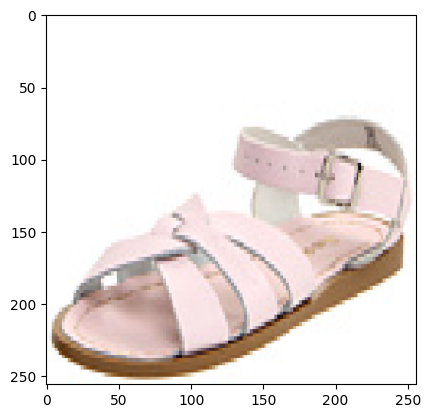

1/1 [==============================] - 0s 31ms/step
Sandals


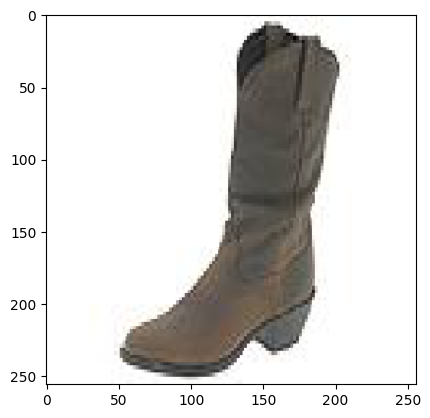

1/1 [==============================] - 0s 36ms/step
boots


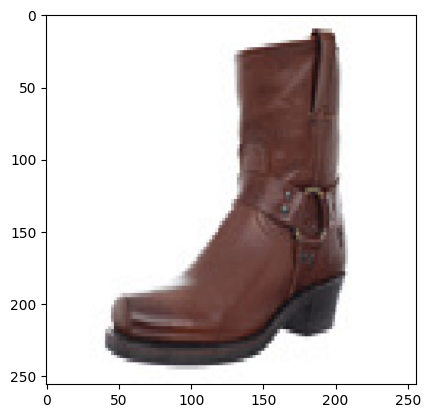

1/1 [==============================] - 0s 36ms/step
boots


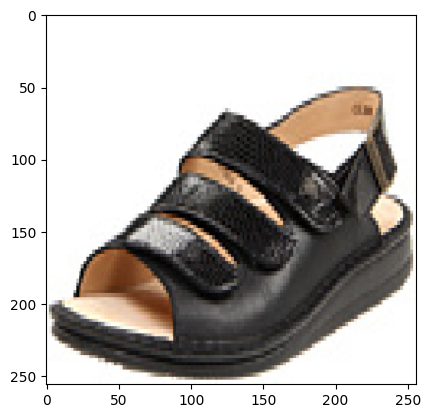

1/1 [==============================] - 0s 32ms/step
Sandals


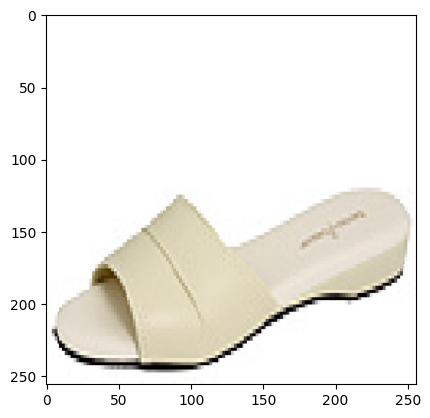

1/1 [==============================] - 0s 33ms/step
Slippers


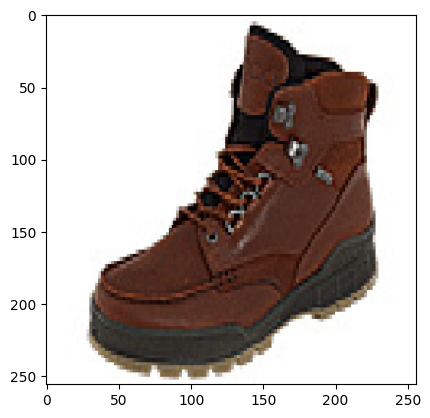

1/1 [==============================] - 0s 29ms/step
boots


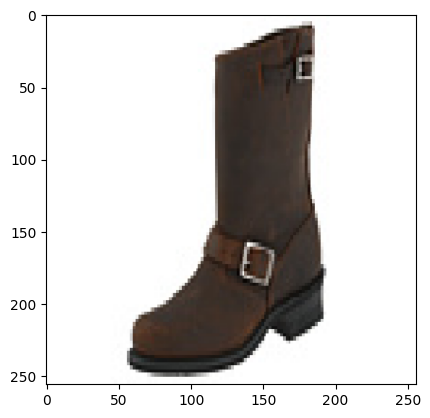

1/1 [==============================] - 0s 30ms/step
boots


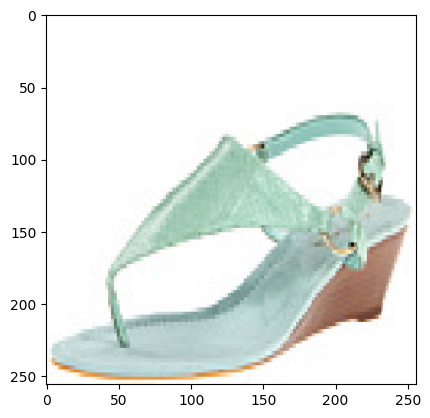

1/1 [==============================] - 0s 39ms/step
Sandals


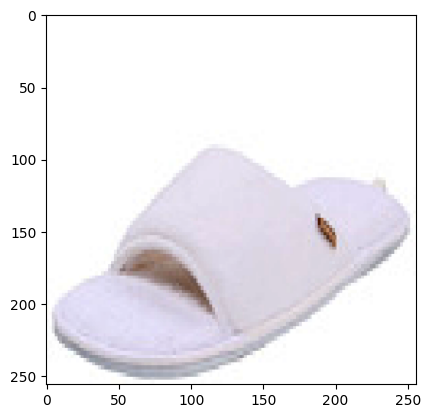

1/1 [==============================] - 0s 30ms/step
Slippers


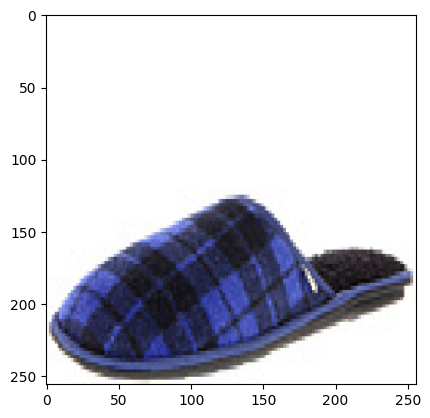

1/1 [==============================] - 0s 39ms/step
Sandals


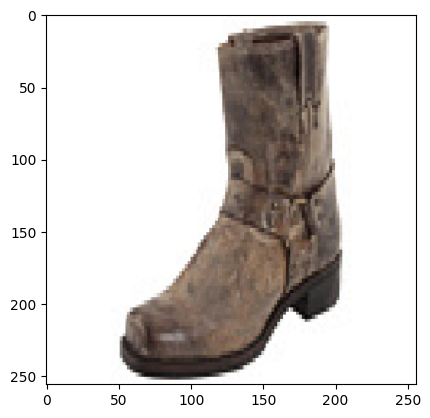

1/1 [==============================] - 0s 30ms/step
boots


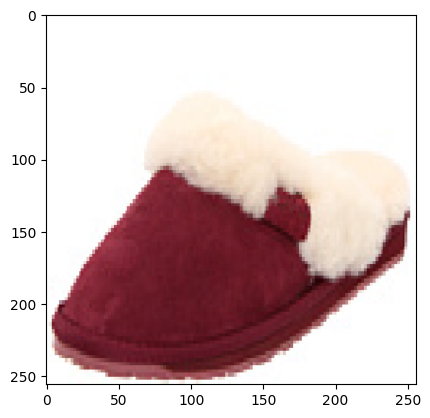

1/1 [==============================] - 0s 38ms/step
Slippers


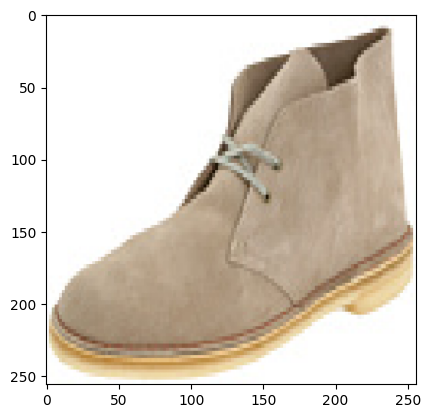

1/1 [==============================] - 0s 30ms/step
boots


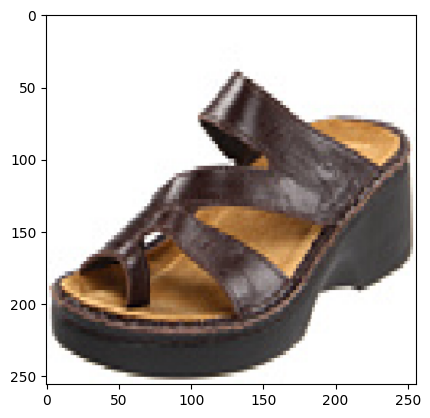

1/1 [==============================] - 0s 36ms/step
Sandals


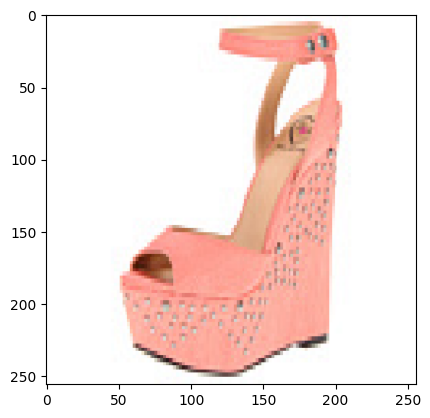

1/1 [==============================] - 0s 39ms/step
boots


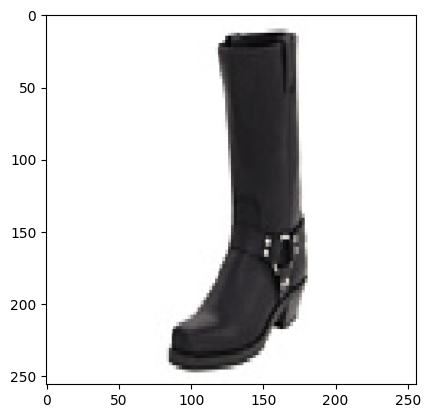

1/1 [==============================] - 0s 35ms/step
boots


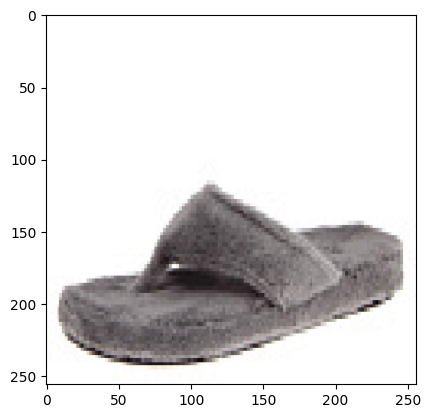

1/1 [==============================] - 0s 29ms/step
Sandals


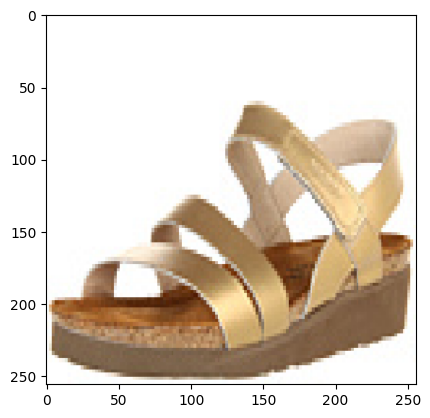

1/1 [==============================] - 0s 30ms/step
Sandals


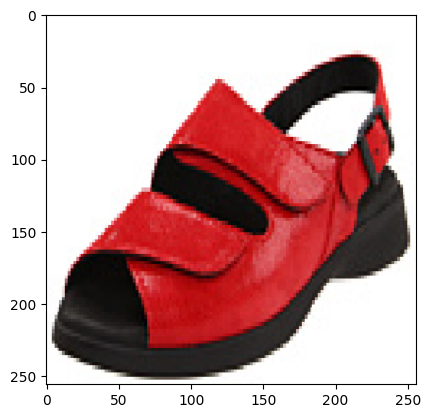

1/1 [==============================] - 0s 28ms/step
Sandals


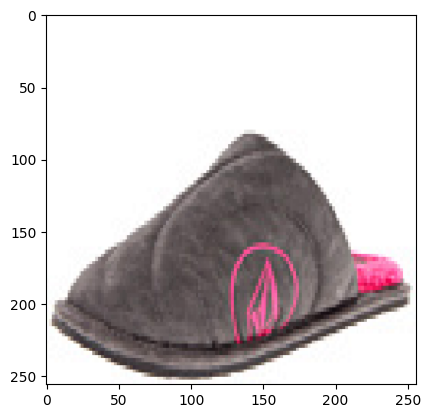

1/1 [==============================] - 0s 29ms/step
Sandals


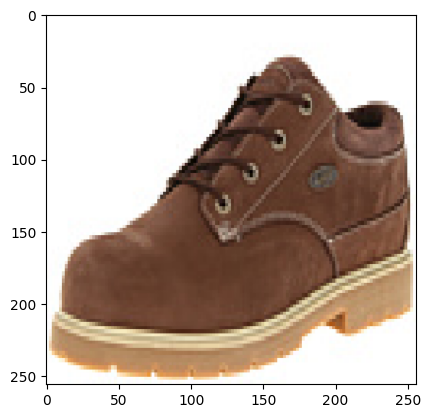

1/1 [==============================] - 0s 29ms/step
boots


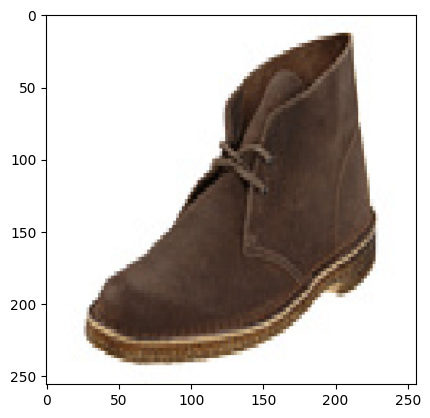

1/1 [==============================] - 0s 30ms/step
boots


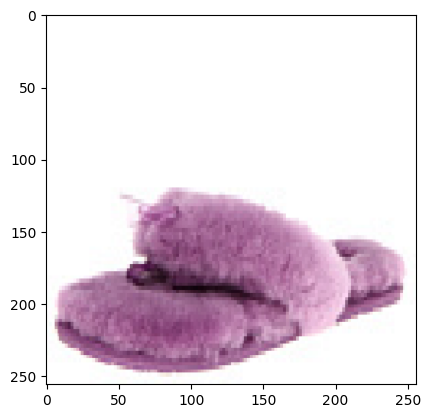

1/1 [==============================] - 0s 37ms/step
Sandals


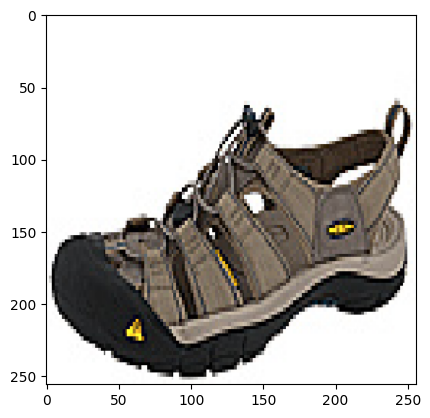

1/1 [==============================] - 0s 30ms/step
Sandals


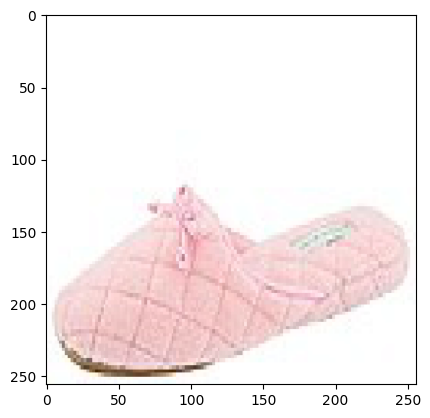

1/1 [==============================] - 0s 29ms/step
Slippers


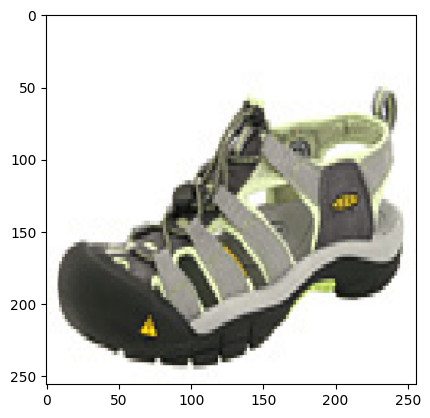

1/1 [==============================] - 0s 34ms/step
Sandals


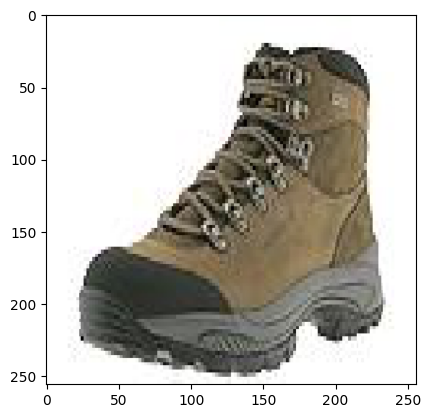

1/1 [==============================] - 0s 37ms/step
boots


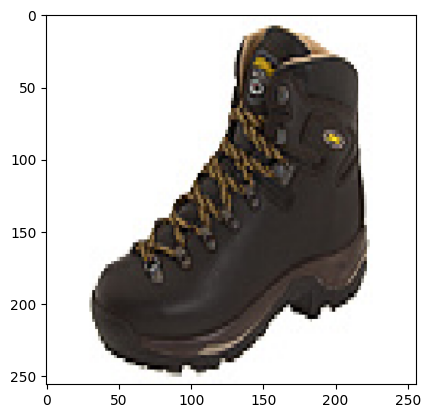

1/1 [==============================] - 0s 36ms/step
boots


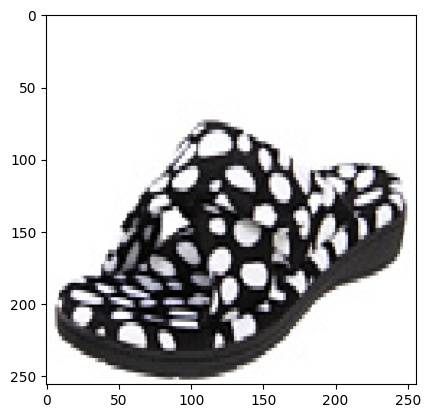

1/1 [==============================] - 0s 37ms/step
Slippers


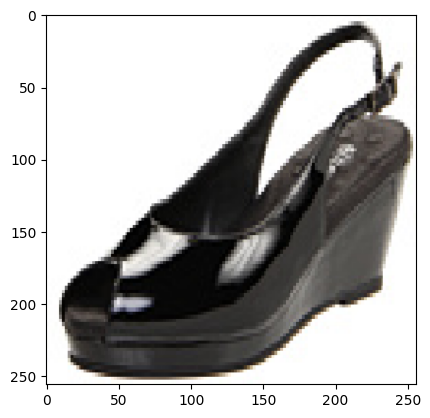

1/1 [==============================] - 0s 37ms/step
Sandals


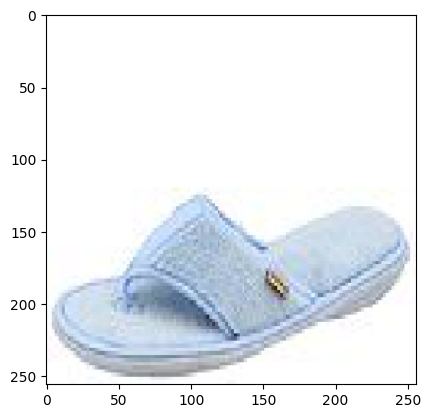

1/1 [==============================] - 0s 37ms/step
Slippers


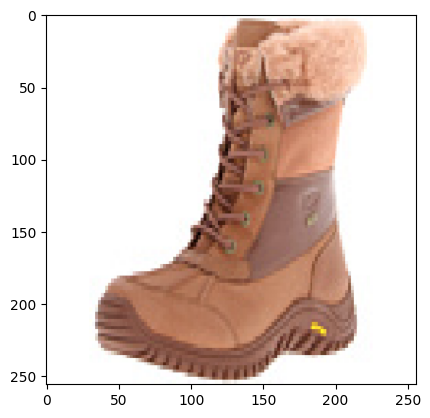

1/1 [==============================] - 0s 36ms/step
boots


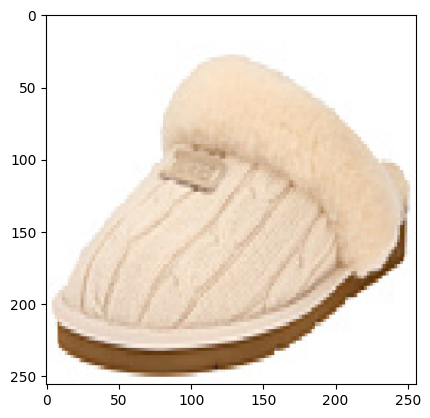

1/1 [==============================] - 0s 27ms/step
Sandals


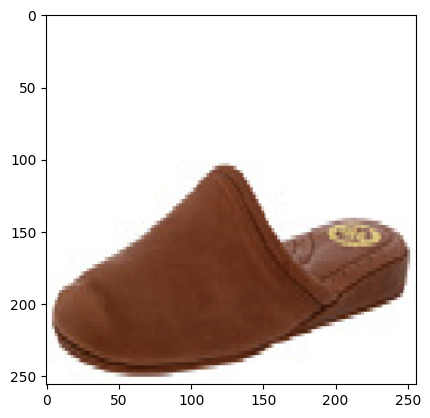

1/1 [==============================] - 0s 29ms/step
Sandals


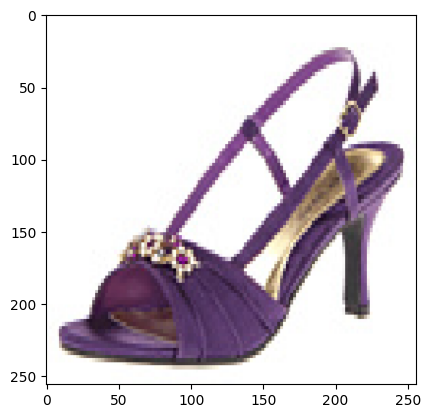

1/1 [==============================] - 0s 29ms/step
Sandals


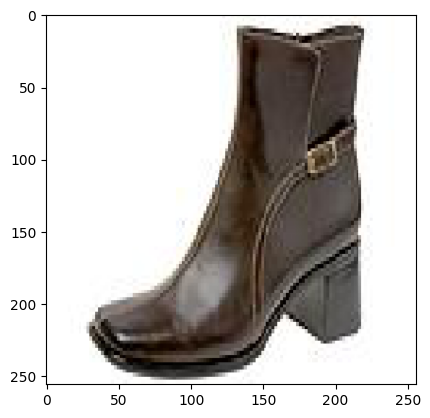

1/1 [==============================] - 0s 28ms/step
boots


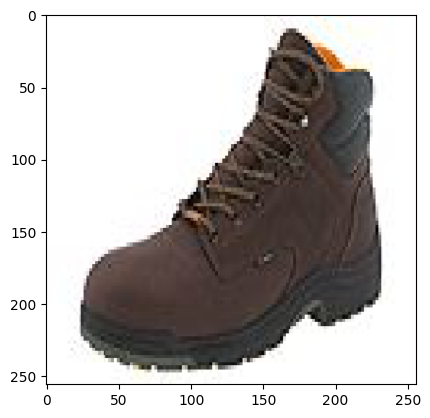

1/1 [==============================] - 0s 29ms/step
boots


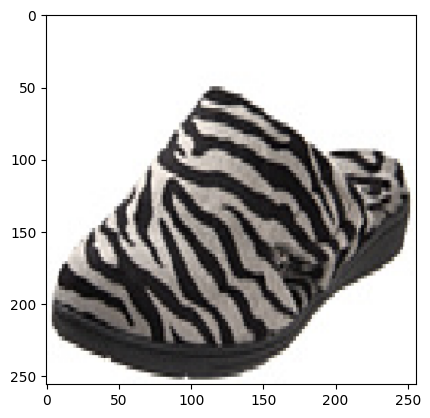

1/1 [==============================] - 0s 27ms/step
Sandals


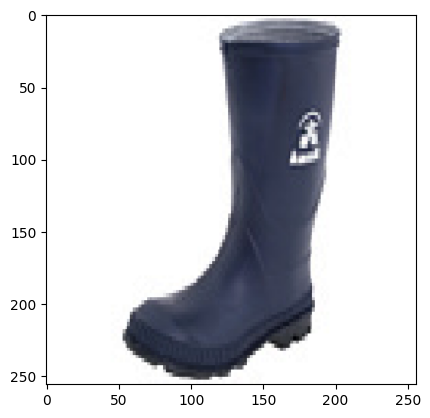

1/1 [==============================] - 0s 29ms/step
boots


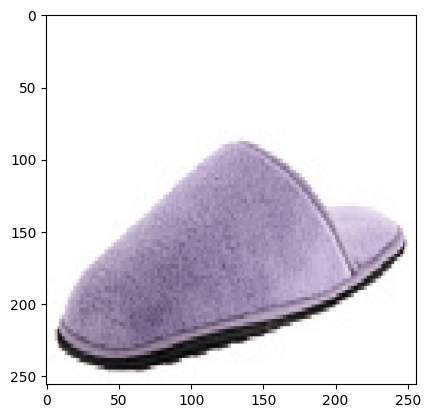

1/1 [==============================] - 0s 28ms/step
Slippers


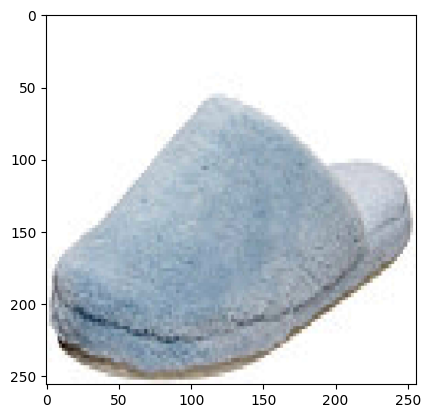

1/1 [==============================] - 0s 39ms/step
Slippers


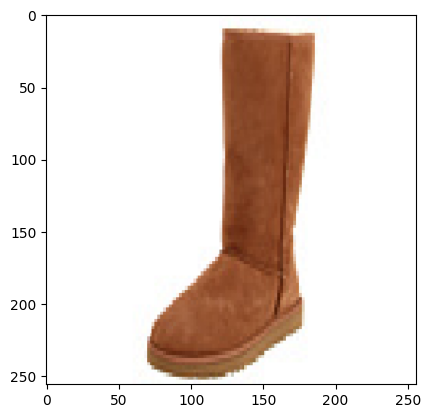

1/1 [==============================] - 0s 30ms/step
boots


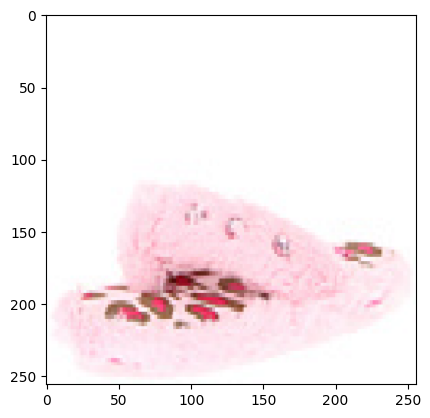

1/1 [==============================] - 0s 29ms/step
Sandals


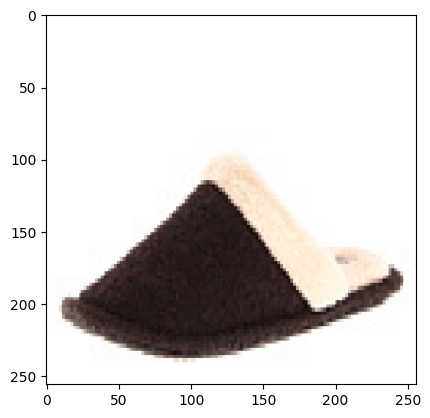

1/1 [==============================] - 0s 30ms/step
Slippers


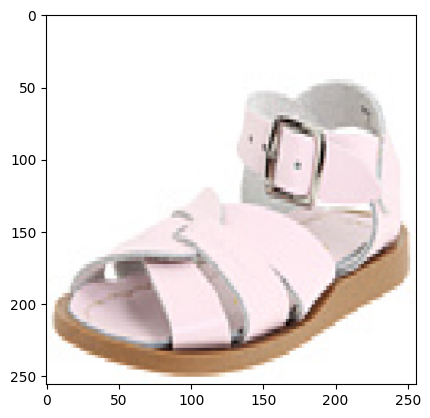

1/1 [==============================] - 0s 39ms/step
Sandals


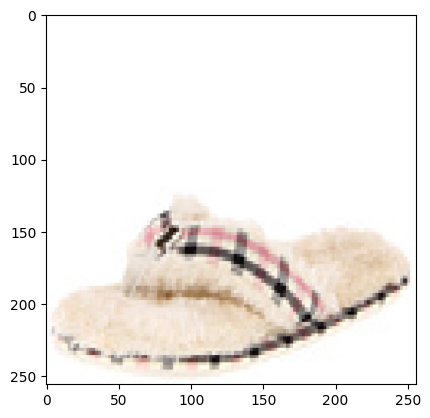

1/1 [==============================] - 0s 30ms/step
Slippers


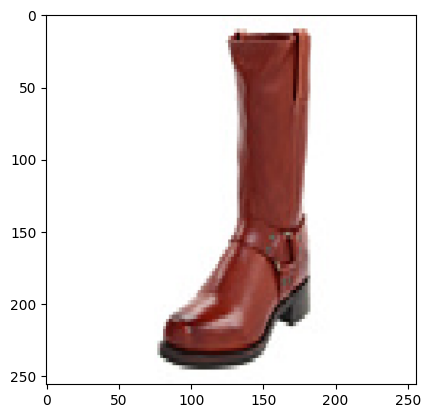

1/1 [==============================] - 0s 28ms/step
boots


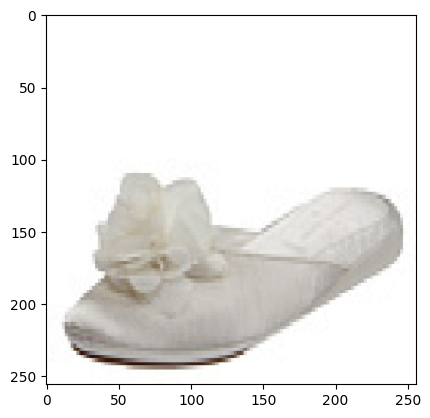

1/1 [==============================] - 0s 28ms/step
Slippers


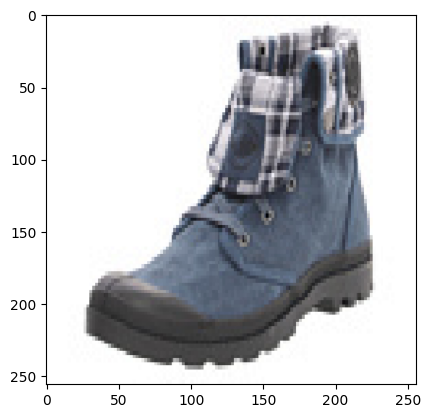

1/1 [==============================] - 0s 29ms/step
Sandals


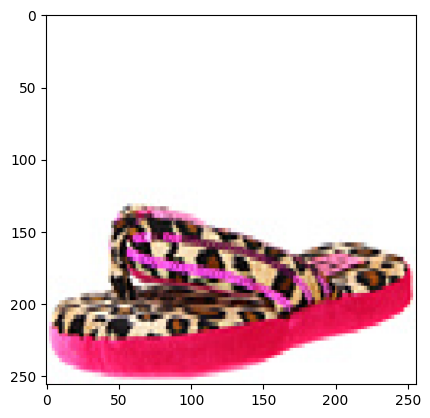

1/1 [==============================] - 0s 29ms/step
Slippers


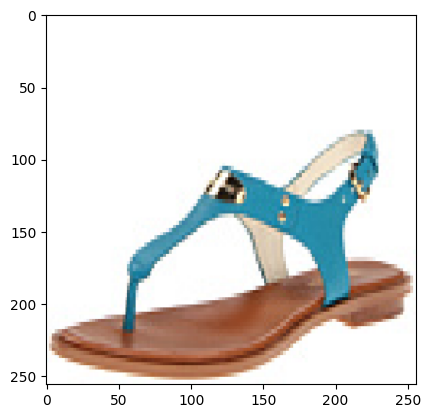

1/1 [==============================] - 0s 30ms/step
Sandals


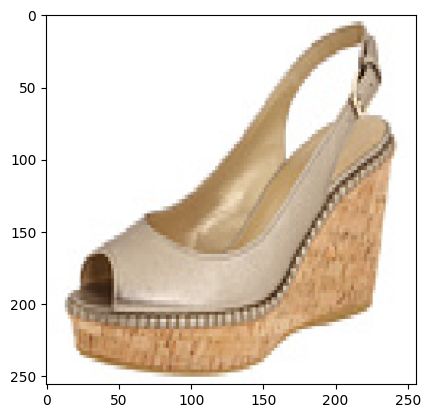

1/1 [==============================] - 0s 38ms/step
boots


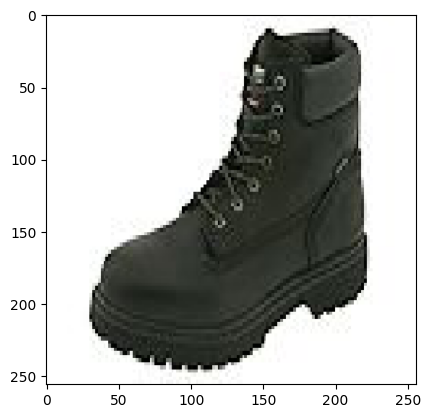

1/1 [==============================] - 0s 28ms/step
boots


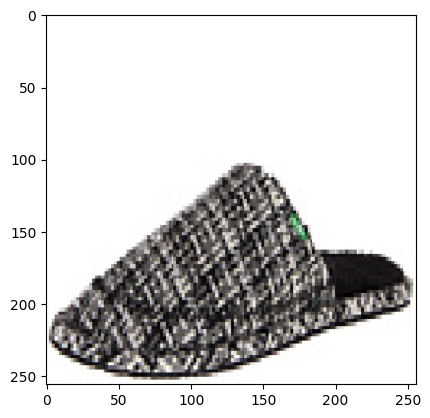

1/1 [==============================] - 0s 29ms/step
Slippers


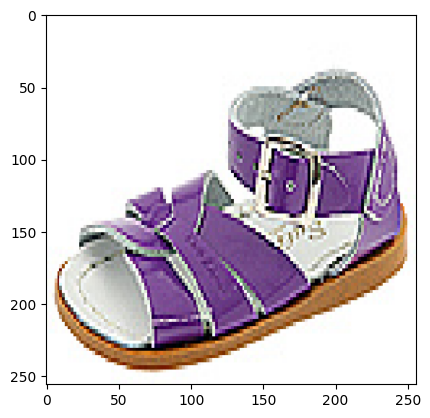

1/1 [==============================] - 0s 35ms/step
Sandals


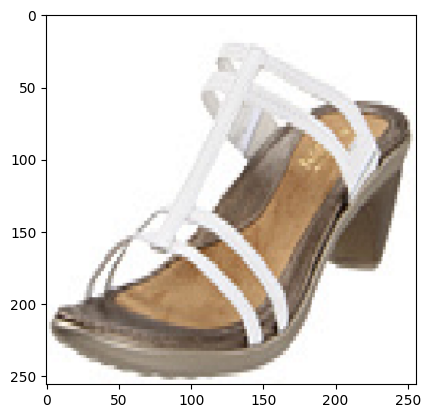

1/1 [==============================] - 0s 28ms/step
Sandals


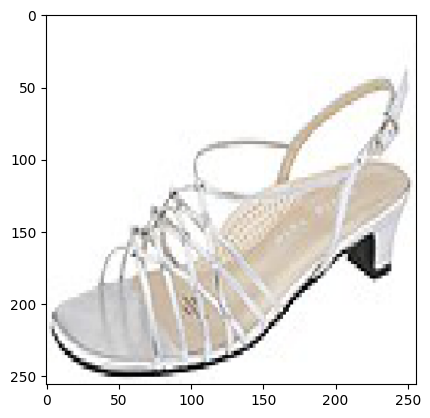

1/1 [==============================] - 0s 29ms/step
Sandals


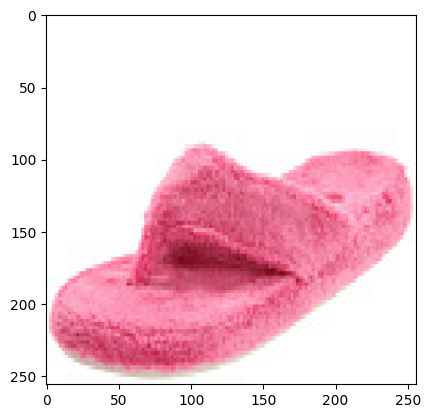

1/1 [==============================] - 0s 28ms/step
Sandals


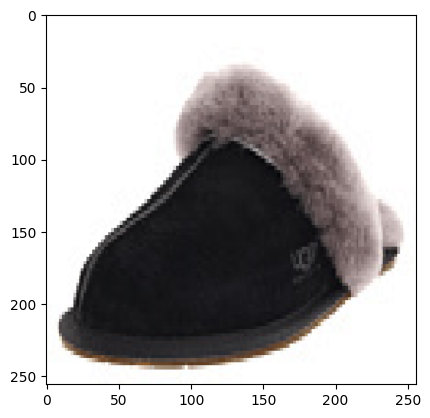

1/1 [==============================] - 0s 28ms/step
boots


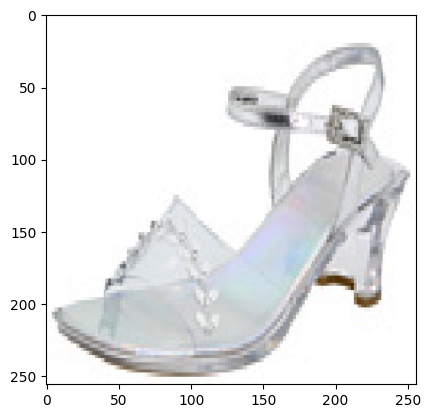

1/1 [==============================] - 0s 30ms/step
Sandals


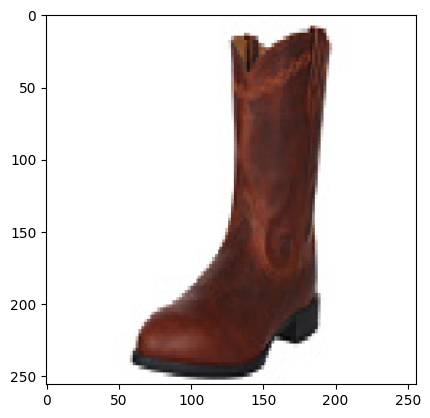

1/1 [==============================] - 0s 30ms/step
boots


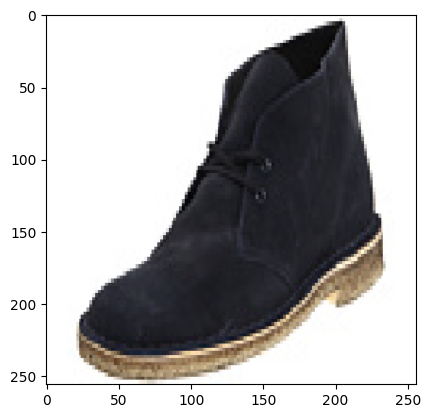

1/1 [==============================] - 0s 30ms/step
boots


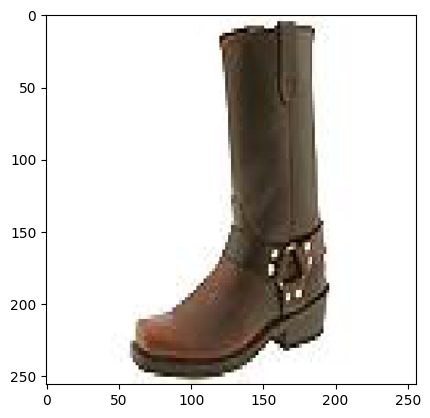

1/1 [==============================] - 0s 29ms/step
boots


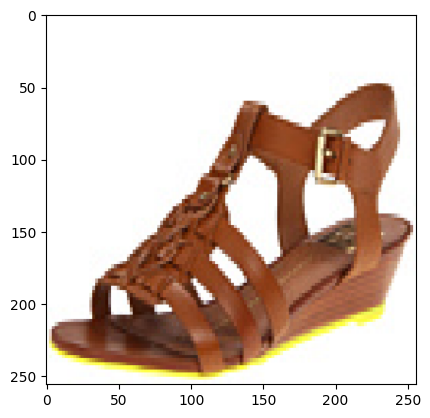

1/1 [==============================] - 0s 30ms/step
Sandals


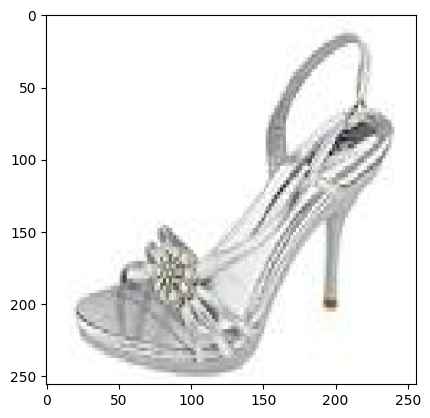

1/1 [==============================] - 0s 30ms/step
Sandals


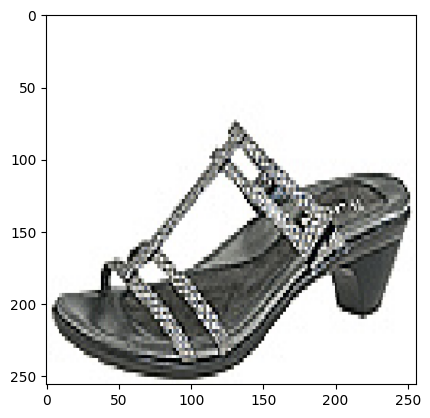

1/1 [==============================] - 0s 31ms/step
Sandals


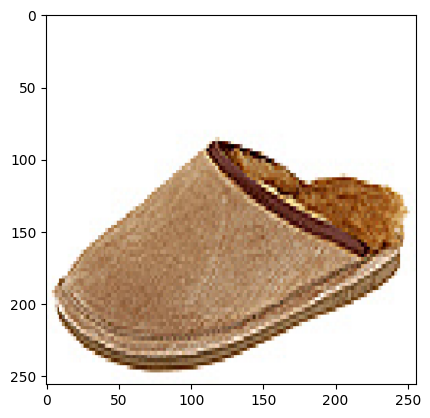

1/1 [==============================] - 0s 28ms/step
Slippers


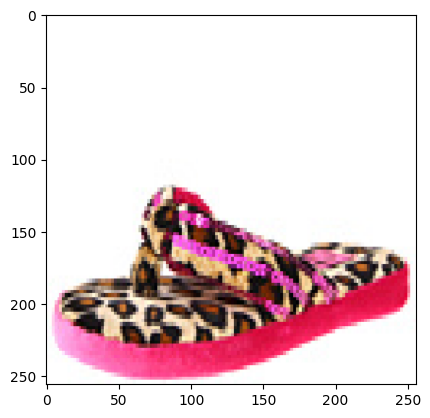

1/1 [==============================] - 0s 29ms/step
Slippers


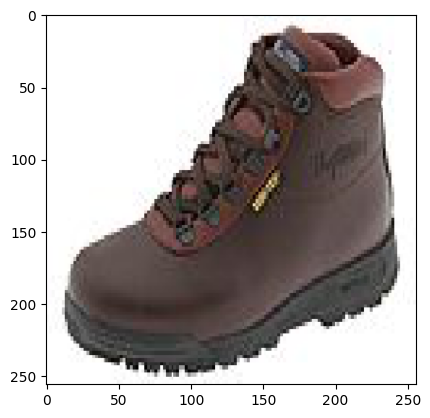

1/1 [==============================] - 0s 37ms/step
boots


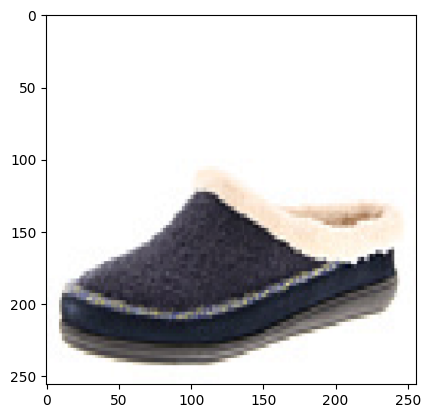

1/1 [==============================] - 0s 38ms/step
Sandals


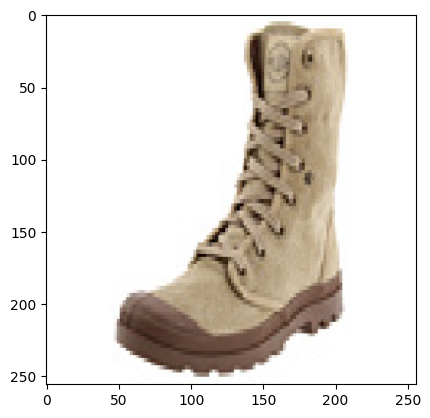

1/1 [==============================] - 0s 31ms/step
boots


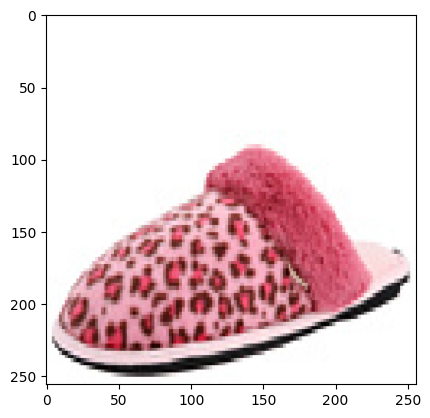

1/1 [==============================] - 0s 36ms/step
Slippers


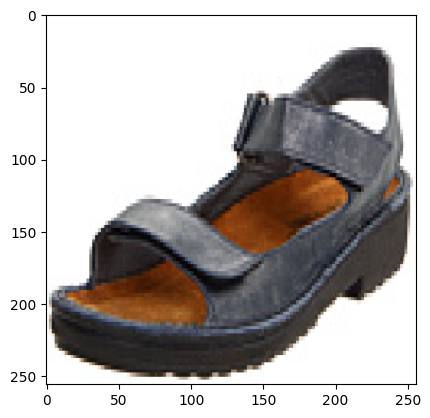

1/1 [==============================] - 0s 28ms/step
boots


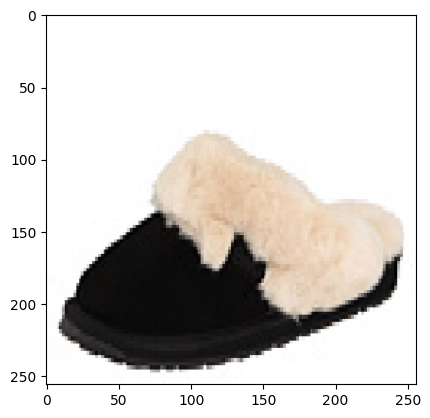

1/1 [==============================] - 0s 29ms/step
Slippers


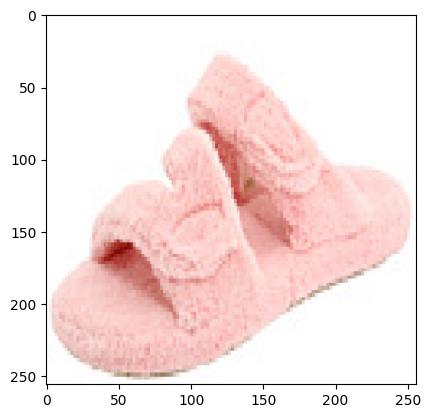

1/1 [==============================] - 0s 29ms/step
Sandals


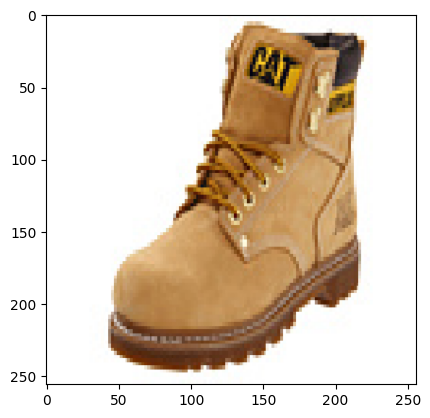

1/1 [==============================] - 0s 32ms/step
boots


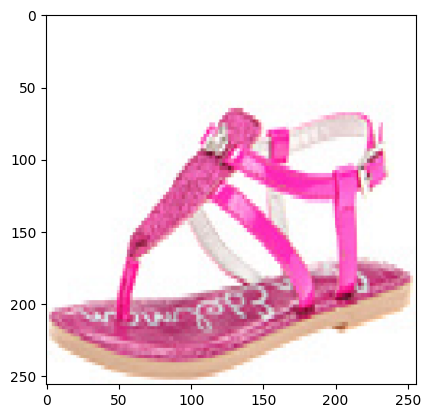

1/1 [==============================] - 0s 29ms/step
Sandals


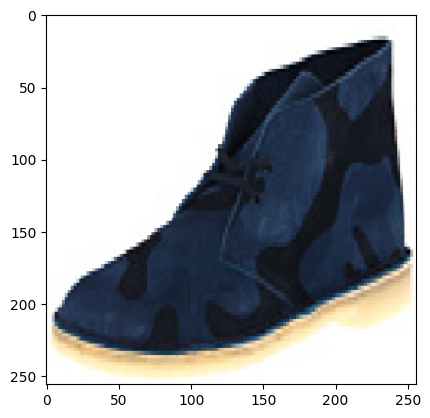

1/1 [==============================] - 0s 29ms/step
Sandals


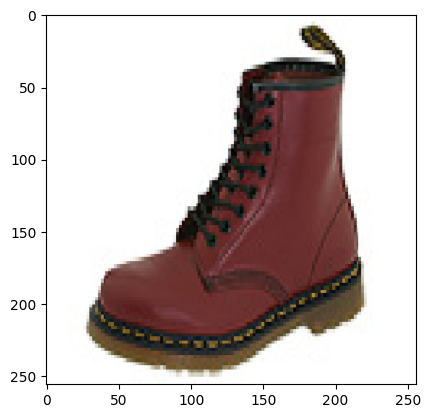

1/1 [==============================] - 0s 38ms/step
boots


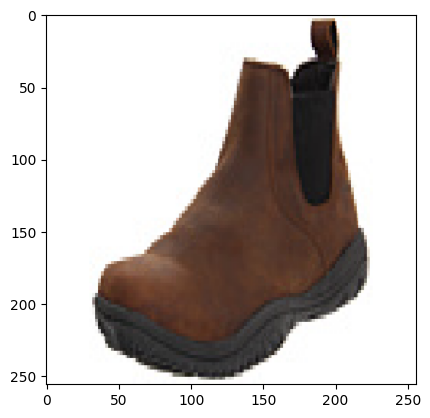

1/1 [==============================] - 0s 29ms/step
boots


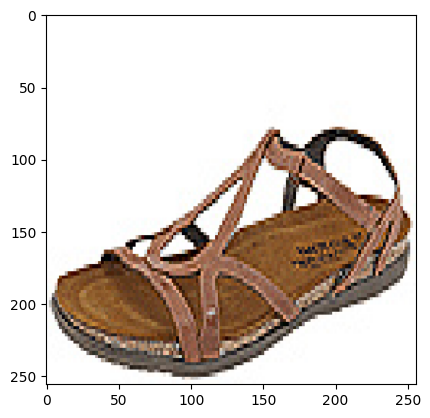

1/1 [==============================] - 0s 28ms/step
Sandals


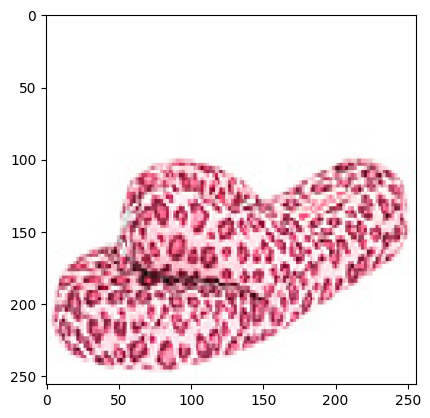

1/1 [==============================] - 0s 30ms/step
Slippers


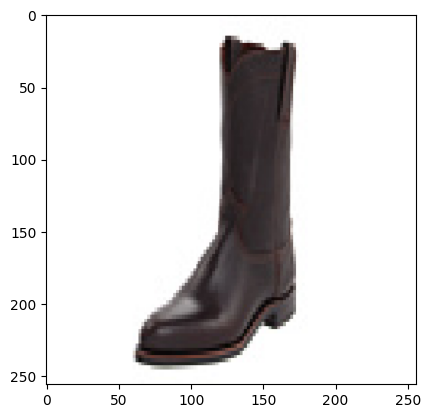

1/1 [==============================] - 0s 28ms/step
boots


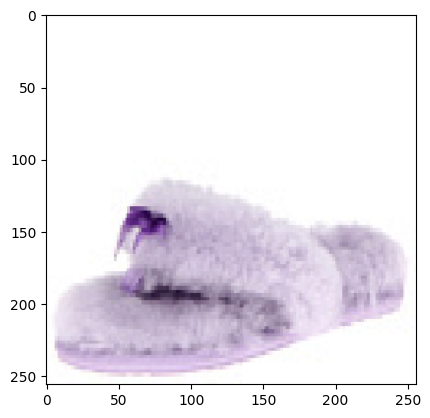

1/1 [==============================] - 0s 29ms/step
Slippers


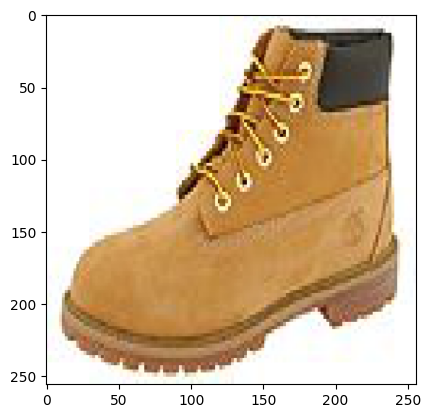

1/1 [==============================] - 0s 37ms/step
boots


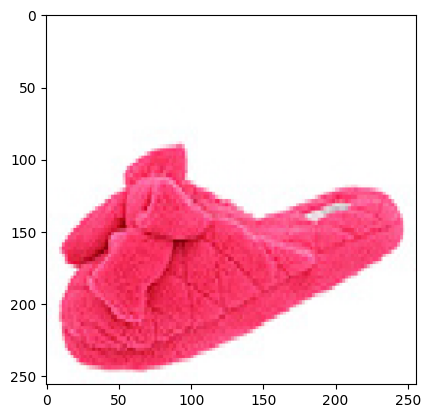

1/1 [==============================] - 0s 29ms/step
Sandals


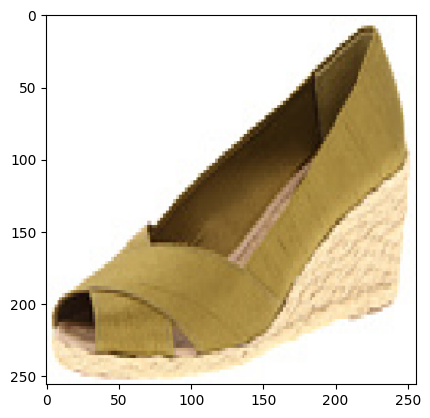

1/1 [==============================] - 0s 30ms/step
boots


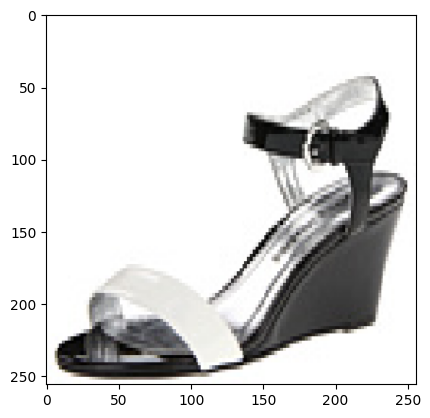

1/1 [==============================] - 0s 36ms/step
Sandals


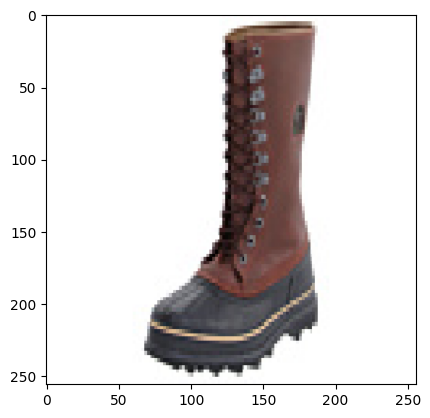

1/1 [==============================] - 0s 32ms/step
boots


In [15]:
for i in range(89):
    plt.imshow(image.array_to_img(test[i][0][0]))
    plt.show()
    new_image=np.expand_dims(test[i][0][0],axis=0)
    result=model.predict(new_image)
    if result[0][0]==1:
        print("boots")
    elif result[0][1]==1:
        print("Sandals")
    else:
        print("Slippers")